Возьмите любую базу картинок (Mnist, Fashion Mnist, Cifar10 или собственную)
На картинках в случайных местах сделайте чёрные квадраты разного размера.
Обучите автокодировщик восстанавливать контент картинок, который скрыт чёрными квадратами
*работать может неидеально
**это не совсем автокодировщик, так как у автокодировщика вход строго равен выходу, но архитектура очень близкая к автокодировщику

In [ ]:
from tensorflow.keras.models import Model, Sequential 

from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils 
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.callbacks import LambdaCallback

import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image
import numpy as np 
import pandas as pd 
from PIL import Image
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

import os 
from google.colab import drive 
import time, random
import seaborn as sns
import random
sns.set_style('darkgrid')

In [ ]:
def draw_rectangle(picture):
  a_center = random.randint(10, 18)
  b_center = random.randint(10, 18)
  heigh = random.randint(0, 10)
  width = random.randint(0, 10)
  pict = picture
  
  for ii in range(a_center - heigh//2, a_center + heigh//2):
     for jj in range(b_center - width//2, b_center + width//2):
       pict[ii][jj] = 0.0
  return pict

In [ ]:
def change_image(pictures):
  new_list = list()
  for elem in pictures:
    new_list.append(draw_rectangle(elem))
  return np.array(new_list)

In [ ]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrainMnist = xTrain.astype('float32')/255 
xTrainMnist = xTrainMnist.reshape(-1, 28, 28, 1)

change_xTest = change_image(xTest)
xTestMnist = change_xTest.astype('float32')/255 
xTestMnist = xTestMnist.reshape(-1, 28, 28, 1) 

In [ ]:
def baseAutoencoder(shape=(112,80,1)): 
    img_input = Input((shape))

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    z = MaxPooling2D()(x)
    

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z)
    x = BatchNormalization()(x) 
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 


    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x)

    x = Conv2D(shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x) 
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error')

    return model

In [ ]:
def plotImages(xTrain, pred, shape=(112, 80)): 
  n = 5  
  plt.figure(figsize=(14, 7)) 
  for i in range(n): 
      index = np.random.randint(0, pred.shape[0]) 
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(xTrain[index].reshape(shape))   
      plt.gray() 
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False) 

      ax = plt.subplot(2, n, i + 1 + n) 
      plt.imshow(pred[index].reshape(shape))      
      plt.gray() 
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()
  

In [ ]:
print(xTest[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [ ]:
print(type(xTest))

<class 'numpy.ndarray'>


In [ ]:
def plotImages(xTrain, index, shape=(28, 28)): 
  plt.figure(figsize=(14, 7)) 
  for i in range(n):
      picture = draw_rectangle(xTrain[index])

      ax = plt.subplot(2, n, i + 1) 
      plt.imshow(picture.reshape(shape))   
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 
  plt.show()

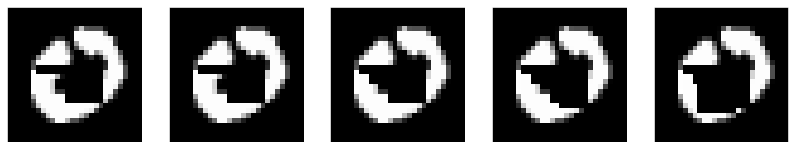

In [ ]:
plotImages(xTest, 25)

In [ ]:
xTrainMnist.shape 

(60000, 28, 28, 1)

In [ ]:
xTrainMnist.shape 

(60000, 28, 28, 1)

In [ ]:
modelAutoMnist = baseAutoencoder((28,28,1)) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
modelAutoMnist.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0     

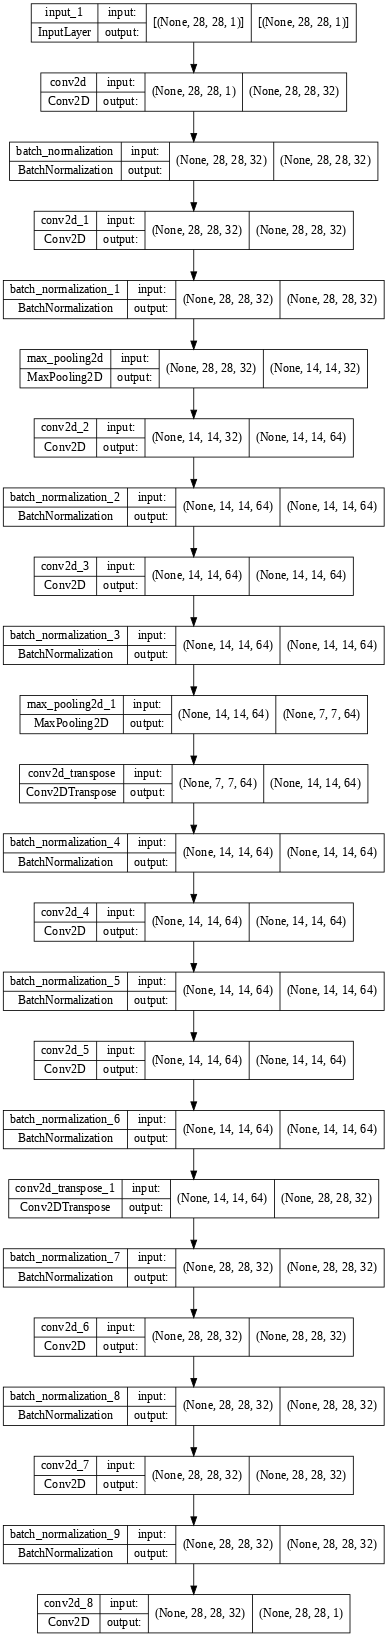

In [ ]:
utils.plot_model(modelAutoMnist, dpi=60, show_shapes=True)

In [ ]:
# Обучаем модель автокодировщика
history = modelAutoMnist.fit(xTrainMnist, xTrainMnist, epochs=5, batch_size=256, validation_data = (xTestMnist, xTestMnist))

Epoch 1/5
235/235 [==============================] - 748s 3s/step - loss: 0.0233 - val_loss: 0.0863
Epoch 2/5
235/235 [==============================] - 752s 3s/step - loss: 0.0105 - val_loss: 0.0100
Epoch 3/5
235/235 [==============================] - 754s 3s/step - loss: 0.0072 - val_loss: 0.0066
Epoch 4/5
235/235 [==============================] - 743s 3s/step - loss: 0.0056 - val_loss: 0.0056
Epoch 5/5
235/235 [==============================] - 743s 3s/step - loss: 0.0045 - val_loss: 0.0049


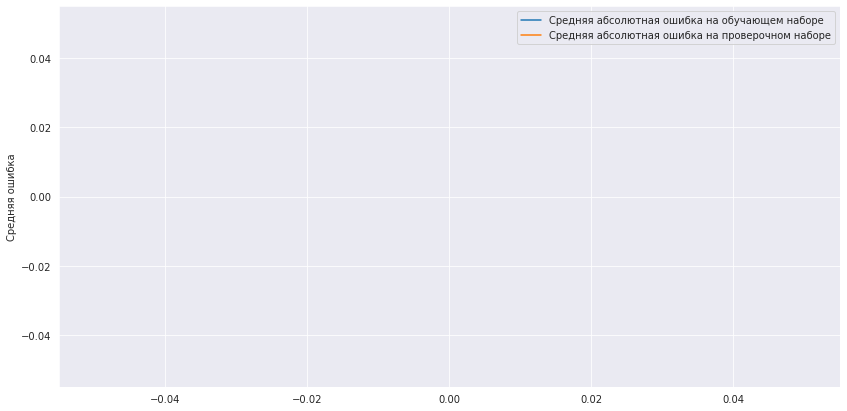

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][10:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][10:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
# modelAutoMnist.save_weights('/content/drive/MyDrive/Nets/modelAutoMnist.h5') # Сохраняем модель
# modelAutoMnist.load_weights('/content/drive/MyDrive/Nets/modelAutoMnist.h5') # Загружаем модель

In [ ]:
predMnistTest = modelAutoMnist.predict(xTestMnist) # Получаем результат работы модели на тестовой выборке
predMnistTest = predMnistTest * 255 # представляем в виде значений от 0 до 255
predMnistTest = predMnistTest.astype('uint8') # устанавливаем 8битовый тип

In [ ]:
plotImages(xTestMnist, predMnistTest, shape=(28,28)) # покажем исходные и восстановленные картинки